In [1]:
import pandas as pd 
import datetime
import matplotlib.pyplot as plt

# Loading the data
df = pd.read_csv("BTC-USD.csv")
display(df)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-28,55974.941406,56610.312500,55071.113281,55950.746094,55950.746094,4.768658e+10
1,2021-03-29,55947.898438,58342.097656,55139.339844,57750.199219,57750.199219,5.762559e+10
2,2021-03-30,57750.132813,59447.222656,57251.550781,58917.691406,58917.691406,5.441412e+10
3,2021-03-31,58930.277344,59930.027344,57726.417969,58918.832031,58918.832031,6.552083e+10
4,2021-04-01,58926.562500,59586.070313,58505.277344,59095.808594,59095.808594,6.166916e+10
...,...,...,...,...,...,...,...
361,2022-03-24,42886.652344,44131.855469,42726.164063,43960.933594,43960.933594,3.104299e+10
362,2022-03-25,43964.546875,44999.492188,43706.285156,44348.730469,44348.730469,3.057441e+10
363,2022-03-26,44349.859375,44735.996094,44166.273438,44500.828125,44500.828125,1.695046e+10
364,2022-03-27,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
# Selecting columns of interest
df = df.loc[:,['Date','Close']]
# Rename the principal column
df.rename(columns={'Close':'Bitcoin_price'}, inplace=True)
# Fill missing values with interpolation
df.Bitcoin_price.interpolate(inplace=True)
# Set date as index 
df.loc[:,'Date'] = df.loc[:,'Date'].astype('datetime64[ns]')
df.set_index(['Date'], inplace=True)

display(df)

,Bitcoin_price
Date,
2021-03-28,55950.746094
2021-03-29,57750.199219
2021-03-30,58917.691406
2021-03-31,58918.832031
2021-04-01,59095.808594
...,...
2022-03-24,43960.933594
2022-03-25,44348.730469
2022-03-26,44500.828125


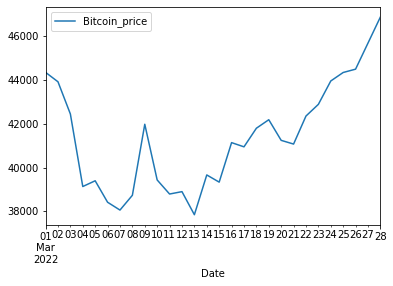

In [3]:
# Cutting the data so we have the bitcoin prices through march
first_date = datetime.datetime(2022, 3, 1)
df_march = df[first_date:]

# Plot the bitcoin time series through march
df_march.plot()
plt.show()

# Save march dataframe
df_march.to_csv("df_march.csv")

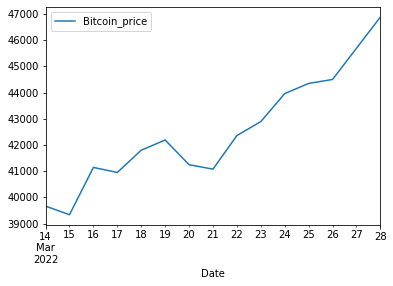

In [4]:
# Cutting the data so we have the bitcoin prices of the last two weeks
initial_date = datetime.datetime(2022, 3, 14)
df_two_weeks= df[initial_date:]

# Plot the bitcoin time series through the last two weeks
df_two_weeks.plot()
plt.show()

# Save last two weeks dataframe
df_two_weeks.to_csv("df_two_weeks.csv")